In [1]:
#importing libraries



import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data

dfbs = pd.read_csv('D:\Case Study\Bike Sharing Assignment\day.csv')

dfbs.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Understanding data

dfbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
dfbs.shape

(730, 16)

In [5]:
dfbs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking missing values

dfbs.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# checking duplicate values present or not by dropping duplicate values

dfbs_dup = dfbs.copy()

# Checking for duplicates and dropping the entire duplicate row if any
dfbs_dup.drop_duplicates(subset=None, inplace=True)

In [8]:
dfbs_dup.shape

(730, 16)

In [9]:
dfbs.shape

(730, 16)

In [12]:
# Cleaning Data

# Droping columns which are not required


# 1) Instant column: It is of no importance just the data row identifier

# 2) dteday column: As we have other date columns to wrok with

# 3) Casual and Registered columb: As we are taking the 'cnt' column into consideration whcih is the sum of both casual and registered column


In [25]:

# Droping instant column as it is index column which has nothing to do with target

dfbs.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with

dfbs.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as we have cnt column which is sum of the both that casual and registered column

dfbs.drop(['casual'], axis = 1, inplace = True)

dfbs.drop(['registered'], axis = 1, inplace = True)


KeyError: "['instant'] not found in axis"

In [26]:
dfbs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization using EDA and Correlation

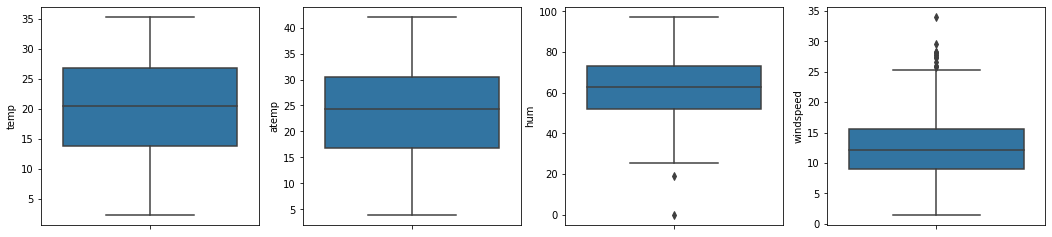

In [27]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=dfbs)
    i+=1

In [28]:
# Convert 'season' and 'Weathersit' into catergorical


In [45]:
dfbs.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

dfbs.weathersit.replace({1:'Clear, Few clouds, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'},inplace = True)

dfbs.mnth = dfbs.mnth.replace({1: 'month_1',2: 'month_2',3: 'month_3',4: 'month_4',5: 'month_5',6: 'month_6',
                  7: 'month_7',8: 'month_8',9: 'month_9',10: 'month_10',11: 'month_11',12: 'month_12'})



dfbs.weekday = dfbs.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})


dfbs.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,"Clear, Few clouds, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,"Clear, Few clouds, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,"Clear, Few clouds, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1080x2160 with 0 Axes>

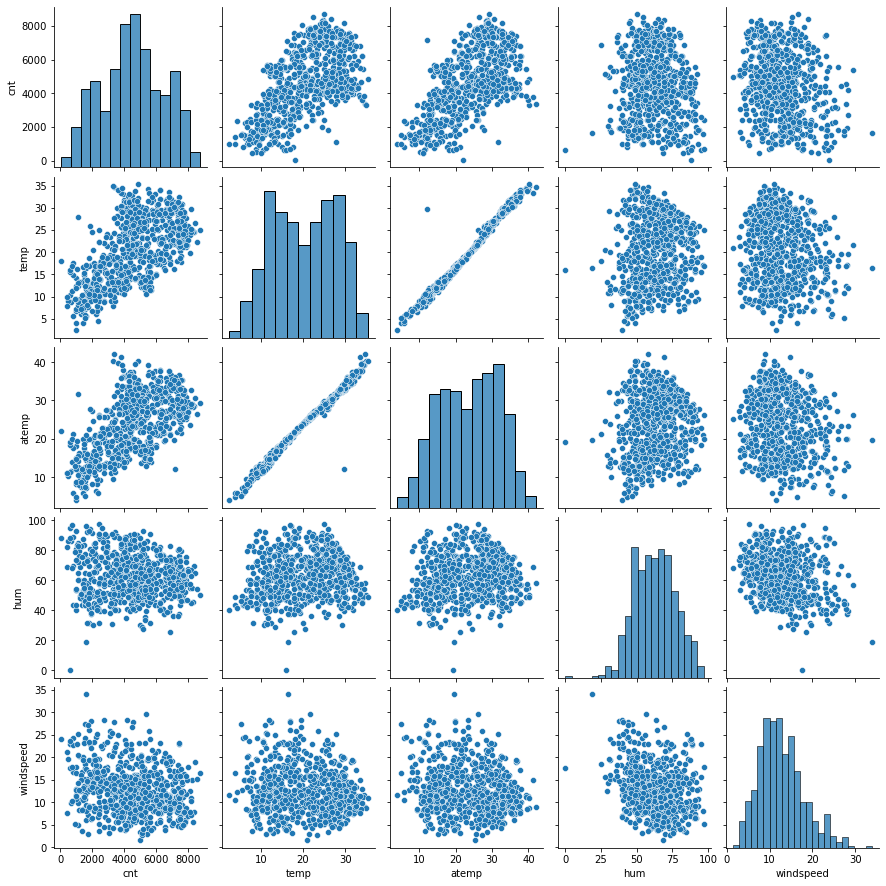

In [46]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=dfbs,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<Figure size 1440x1080 with 0 Axes>

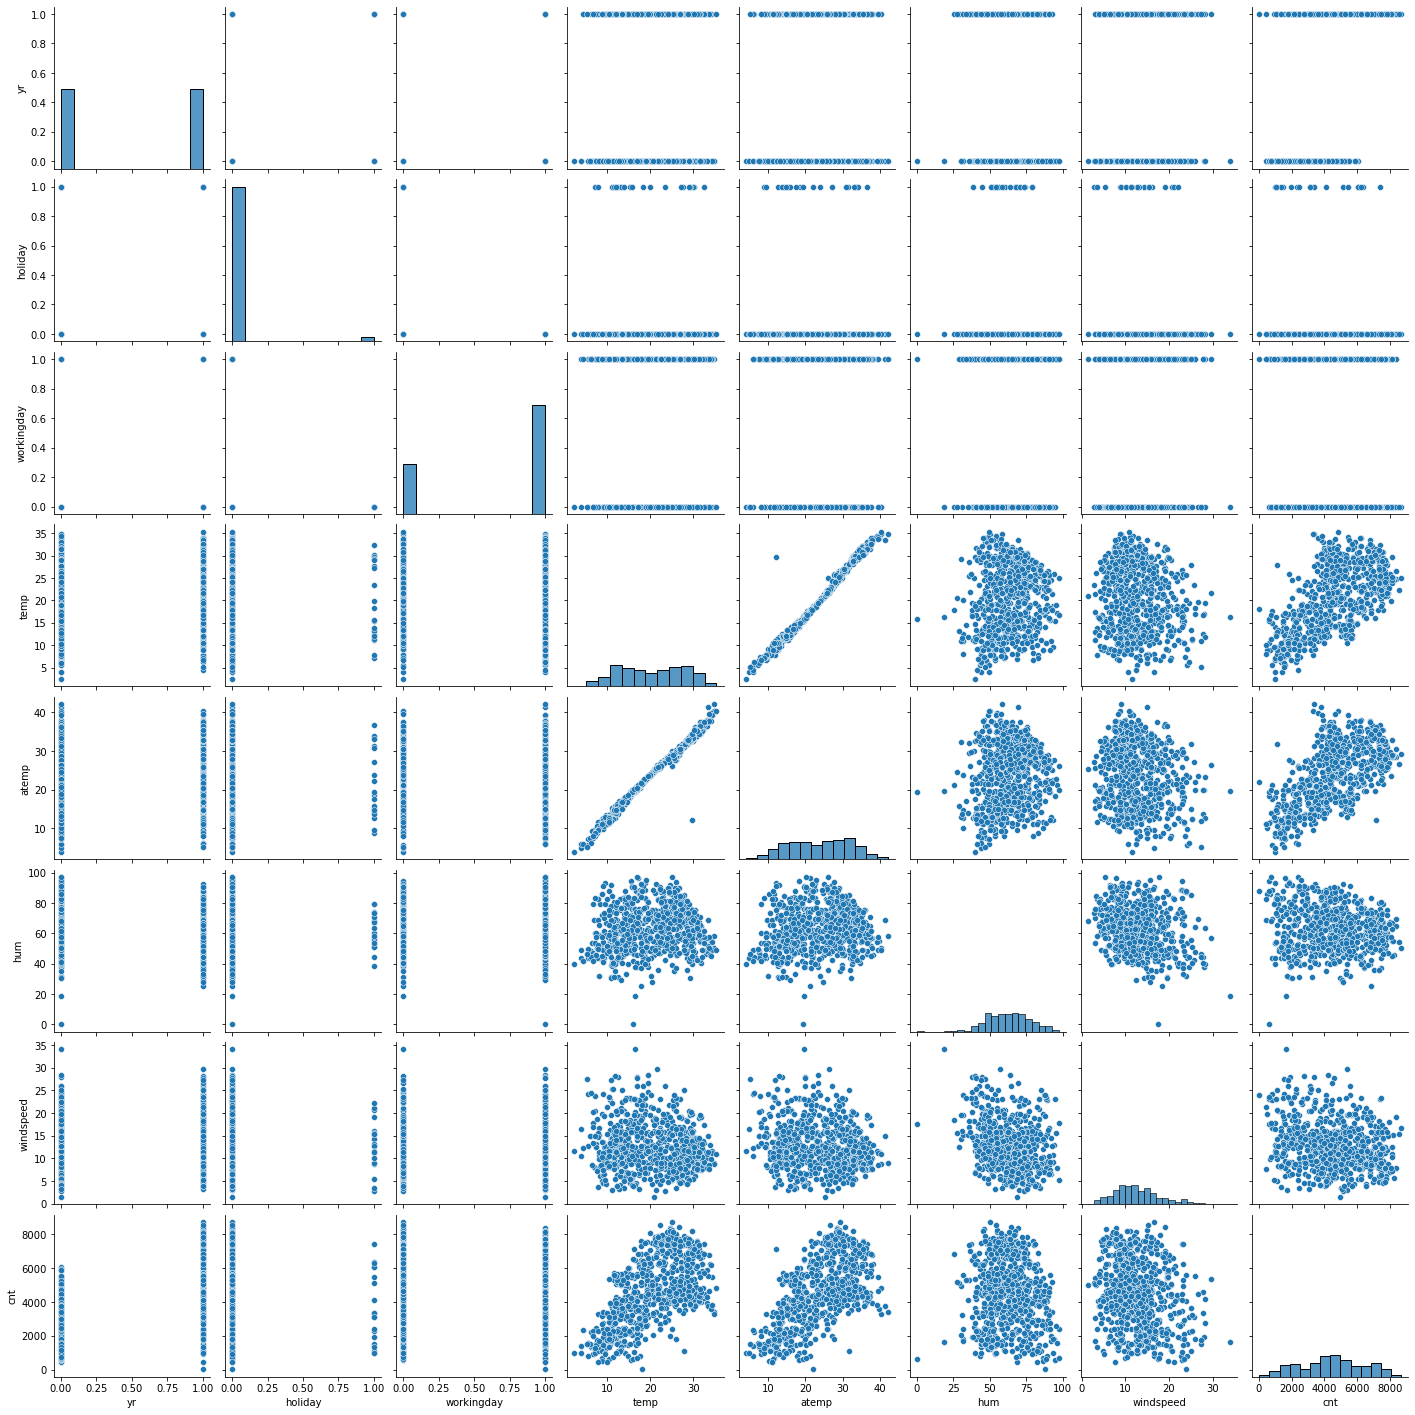

In [48]:
plt.figure(figsize=(20,15))
sns.pairplot(dfbs)
plt.show()

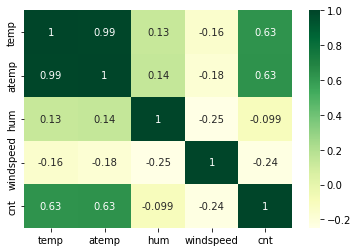

In [50]:
# Checking continuous variables relationship with each other
sns.heatmap(dfbs[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGn', annot = True)
plt.show()

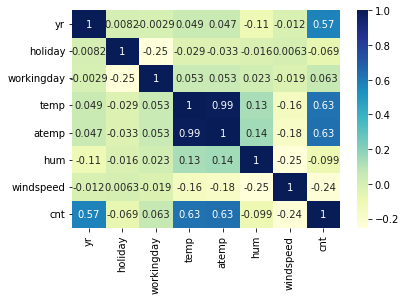

In [51]:
#Correlations for numeric variables
cor=dfbs.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

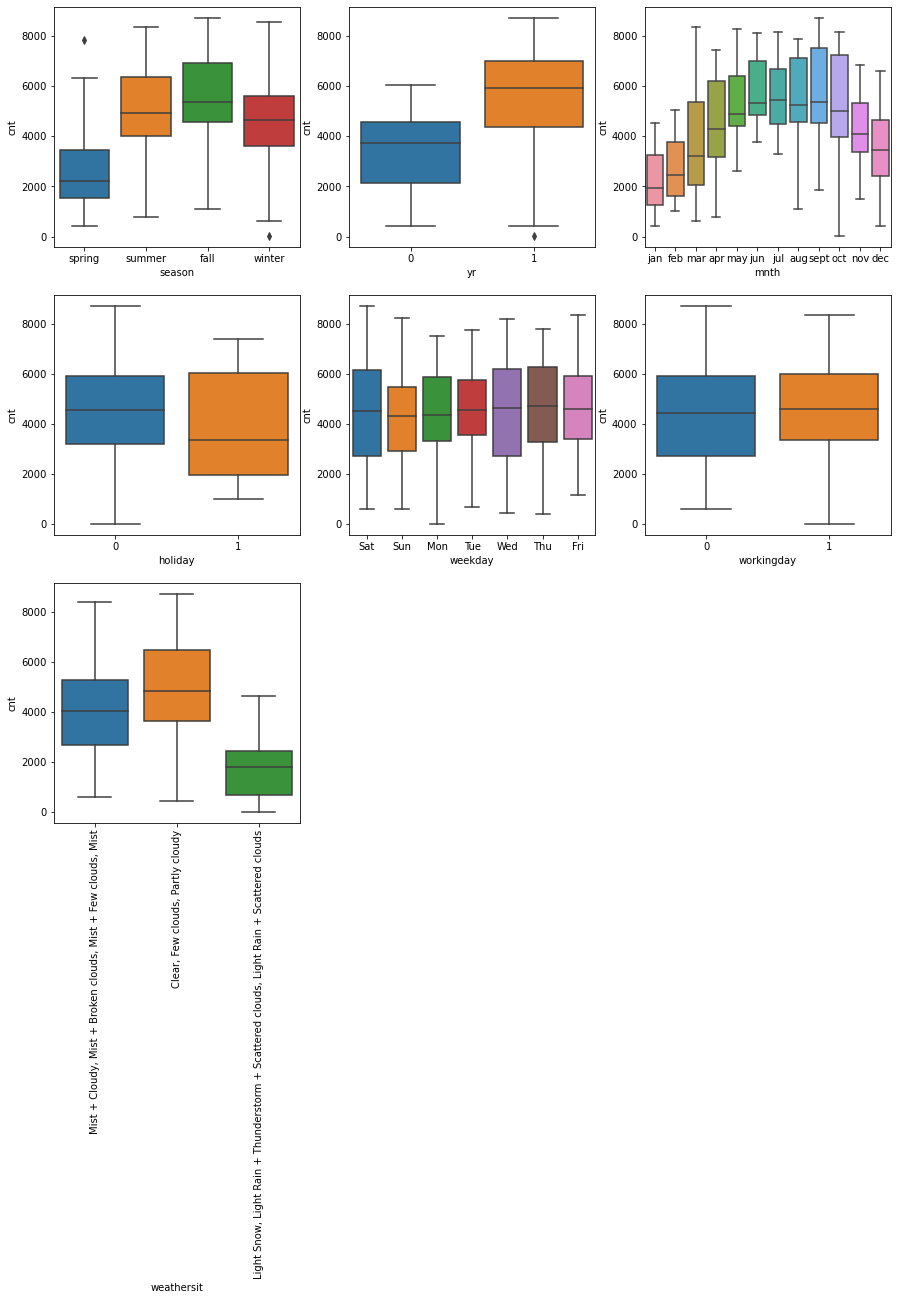

In [53]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=dfbs, x=i[1], y='cnt')
plt.xticks(rotation=90)
plt.show()

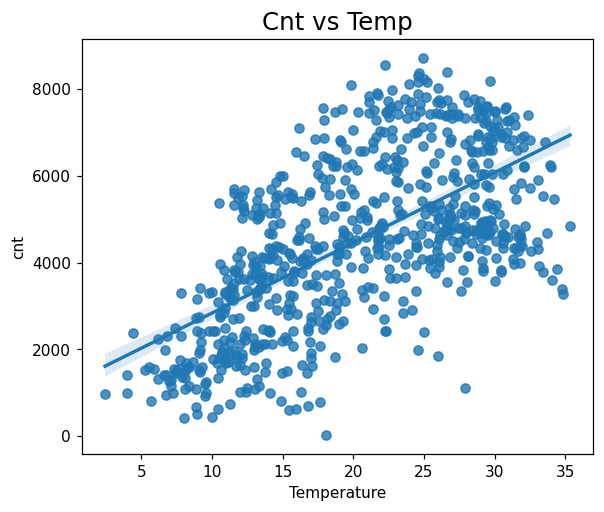

In [54]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=dfbs,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

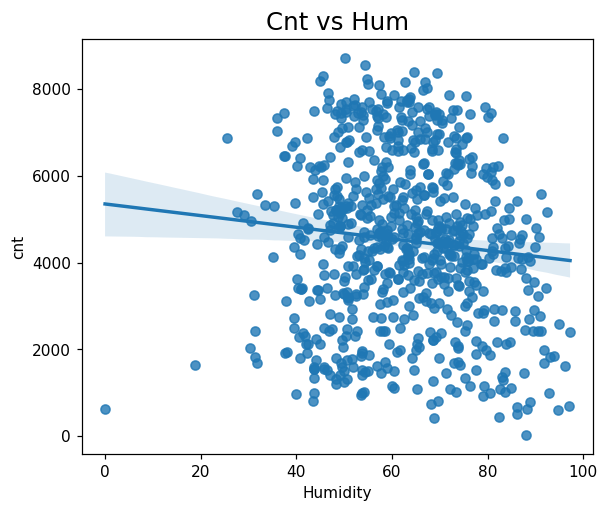

In [56]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data= dfbs,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

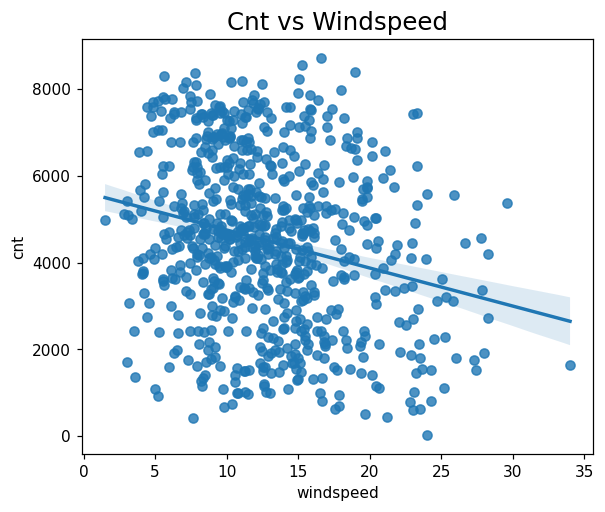

In [58]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=dfbs,y="cnt",x="windspeed")
plt.show()

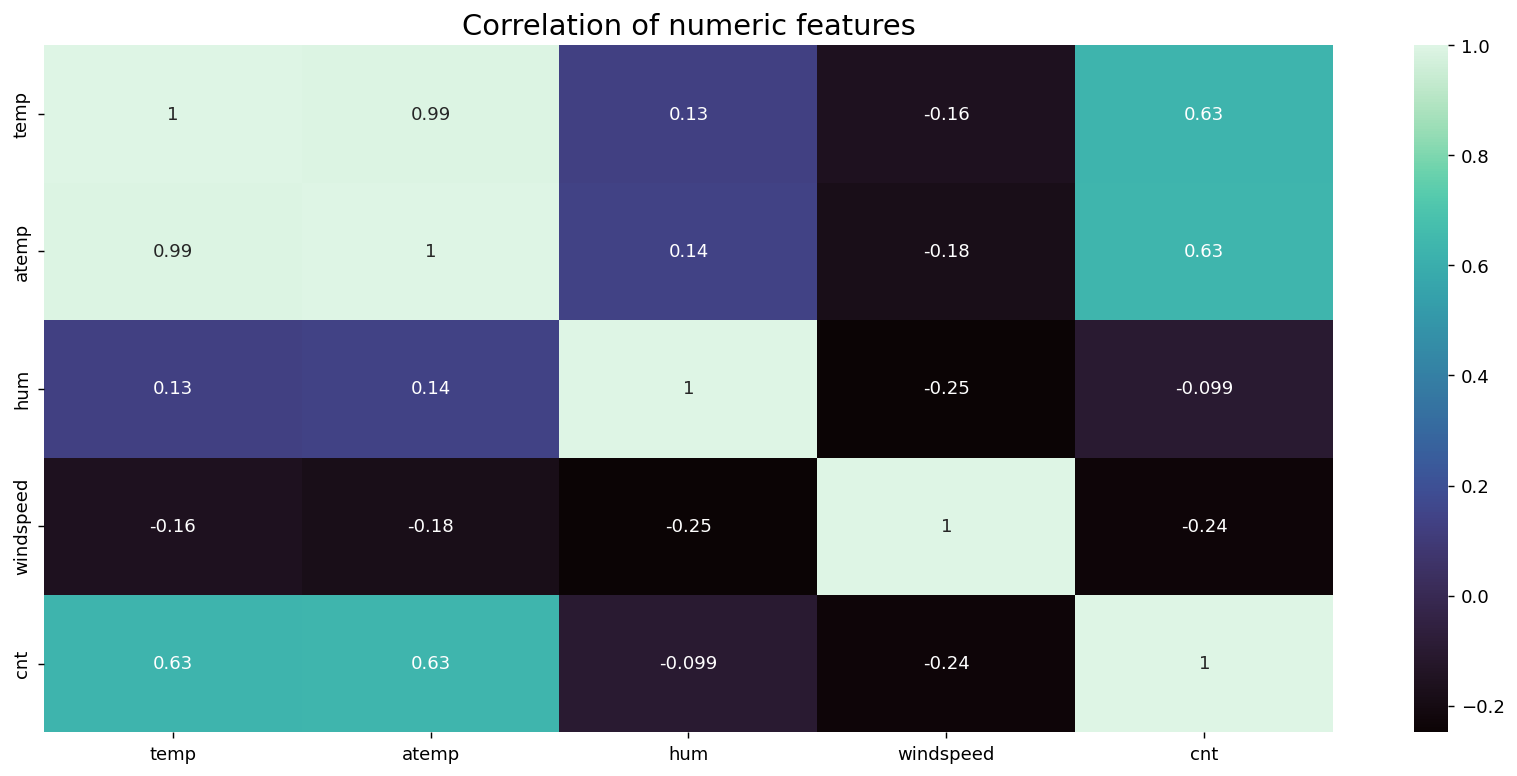

In [60]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(16,7),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(dfbs[num_features].corr(),annot= True,cmap="mako")
plt.show()

# Data Preparation

In [69]:
# Creating dummy variables for all categorical variables



dfbs = pd.get_dummies(data=dfbs,columns=["season","mnth","weekday"], drop_first=True)
dfbs = pd.get_dummies(data=dfbs,columns=["weathersit"])

In [70]:
dfbs.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear, Few clouds, Partly cloudy',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [71]:
#Print few rows to inspect
dfbs.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Clear, Few clouds, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


# Data Modelling

In [ ]:
# Spliting the daata into training and test

In [74]:
# Checking shape before splitting
dfbs.shape

(730, 31)

In [89]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(dfbs, train_size = 0.70, test_size = 0.30, random_state = 333)

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 31 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   yr                                                                                                  510 non-null    int64  
 1   holiday                                                                                             510 non-null    int64  
 2   workingday                                                                                          510 non-null    int64  
 3   temp                                                                                                510 non-null    float64
 4   atemp                                                                                               510 non-null  

In [95]:
df_train.shape

(510, 31)

In [96]:
df_test.shape

(219, 31)

In [97]:
y_train = df_train.pop('cnt')
X_train = df_train

In [98]:
print(X_train.shape)
print(y_train.shape)

(510, 30)
(510,)


# Feature Scaling

In [ ]:
# Importing required library

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [99]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Clear, Few clouds, Partly cloudy","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,20.222164,23.594534,62.311249,12.755513,0.24902,0.247059,0.241176,...,0.082353,0.139216,0.150980,0.143137,0.129412,0.141176,0.150980,0.633333,0.025490,0.341176
std,0.500487,0.151726,0.466018,7.498761,8.137295,14.410726,5.208598,0.43287,0.431725,0.428217,...,0.275172,0.346511,0.358381,0.350557,0.335985,0.348545,0.358381,0.482368,0.157763,0.474570
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.000663,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.212850,12.083316,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.947900,15.614484,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build a Model using RFE and Automated approach

In [107]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [108]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [115]:
#Cut down number of features to 15 using automated approach

rfe =RFE(lr,step=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [116]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', False, 2),
 ('atemp', False, 2),
 ('hum', False, 2),
 ('windspeed', False, 2),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 2),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 2),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 2),
 ('weathersit_Clear, Few clouds, Partly cloudy', True, 1),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  True,
  1)]

In [ ]:
# Manual elimination


In [ ]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [117]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [118]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weekday_Mon', 'weekday_Sun',
       'weathersit_Clear, Few clouds, Partly cloudy',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [119]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_oct',
       'weekday_Sat', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [121]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_Sat',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']]

In [122]:
X_train_rfe.shape

(510, 15)

# Build Model

In [124]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

NameError: name 'build_model' is not defined